# 图像平滑
## 目标
- 学习使用不同的低通滤波器对图像进行模糊
- 使用自定义的滤波器对图像进行卷积（ 2D 卷积）2D 卷积  
与以为信号一样，我们也可以对 2D 图像实施低通滤波（ LPF），高通滤波
（ HPF）等。 LPF 帮助我们去除噪音，模糊图像。 HPF 帮助我们找到图像的边
缘  
OpenCV 提供的函数 cv.filter2D() 可以让我们对一幅图像进行卷积操
作。下面我们将对一幅图像使用平均滤波器。下面是一个 5x5 的平均滤波器核：  
$$K =\frac{1}{25}\begin{bmatrix}
{1}&{1}&{1}&{1}&{1}\\
{1}&{1}&{1}&{1}&{1}\\
{1}&{1}&{1}&{1}&{1}\\
{1}&{1}&{1}&{1}&{1}\\
{1}&{1}&{1}&{1}&{1}\\
\end{bmatrix}$$  
操作如下：将核放在图像的一个像素 A 上，求与核对应的图像上 25（ 5x5）
个像素的和，在取平均数，用这个平均数替代像素 A 的值。重复以上操作直到
将图像的每一个像素值都更新一遍。代码如下，运行一下吧。

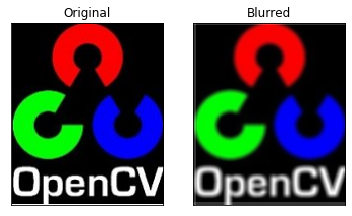

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('opencv_logo.png')
kernel = np.ones((5,5),np.float32)/25
#cv.Filter2D(src, dst, kernel, anchor=(-1, -1))
#ddepth –desired depth of the destination image;
#if it is negative, it will be the same as src.depth();
#the following combinations of src.depth() and ddepth are supported:
#src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F
#src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F
#src.depth() = CV_64F, ddepth = -1/CV_64F
#when ddepth=-1, the output image will have the same depth as the source.

dst = cv2.filter2D(img,-1,kernel)
imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blurRGB = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(imageRGB),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurRGB),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 图像模糊（图像平滑）
使用低通滤波器可以达到图像模糊的目的。这对与去除噪音很有帮助。其
实就是去除图像中的高频成分（比如：噪音，边界）。所以边界也会被模糊一
点。（当然，也有一些模糊技术不会模糊掉边界）。 OpenCV 提供了四种模糊技
术。

## 12.1 平均
这是由一个归一化卷积框完成的。他只是用卷积框覆盖区域所有像素的平
均值来代替中心元素。可以使用函数 cv2.blur() 和 cv2.boxFilter() 来完
这个任务。可以同看查看文档了解更多卷积框的细节。我们需要设定卷积框的
宽和高。下面是一个 3x3 的归一化卷积框：  
$$K =\frac{1}{9}\begin{bmatrix}
{1}&{1}&{1}\\
{1}&{1}&{1}\\
{1}&{1}&{1}\\
\end{bmatrix}$$  

<table><tr><td bgcolor=green>注意：如果你不想使用归一化卷积框，你应该使用 cv2.boxFilter()，这时要传入参数 normalize=False。</td></tr></table>
下面与第一部分一样的一个例子：

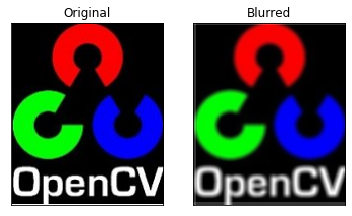

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('opencv_logo.png')
blur = cv2.blur(img,(5,5))

imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blurRGB = cv2.cvtColor(blur,cv2.COLOR_BGR2RGB)
plt.subplot(121),plt.imshow(imageRGB),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurRGB),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 12.2 高斯模糊
现在把卷积核换成高斯核（简单来说，方框不变，将原来每个方框的值是
相等的，现在里面的值是符合高斯分布的，方框中心的值最大，其余方框根据
距离中心元素的距离递减，构成一个高斯小山包。原来的求平均数现在变成求
加权平均数，全就是方框里的值）。实现的函数是 cv2.GaussianBlur()。我
们需要指定高斯核的宽和高（必须是奇数）。以及高斯函数沿 X， Y 方向的标准
差。如果我们只指定了 X 方向的的标准差， Y方向也会取相同值。如果两个标
准差都是 0，那么函数会根据核函数的大小自己计算。高斯滤波可以有效的从
图像中去除高斯噪音。    
如果你愿意的话，你也可以使用函数 cv2.getGaussianKernel() 自己构建一个高斯核。  
#### cv.GaussianBlur():
- dst = cv.GaussianBlur(src,,ksize,sigmaX[,dst[,sigmaY[,borderType]]]),
- src:输入土象，通道数不限，深度为CV_8U,CV_16U,CV_16S,CV_32F or CV_64F  
- dst:输出图像
- ksize:高斯内核的大小（Gaussian kernel size）,宽（ksize.width）和高(ksize.height)可以不同，但是必须为正的奇数，或者设置为0然后通过sigma计算出来
- sigmaX:X方向的Gaussian kernel标准差standar deviation in X  direction
- sigmaY:Y方向的Gaussian kernel标准差，如果sigmaY为0，默认等于sigmaX
- 如果sigmaX，sigmaY都为0，会根据ksize.width和ksize.height计算
- borderType:边界扩张的方法
如果要使用高斯模糊的话，上边的代码应该写成：

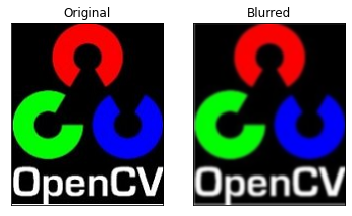

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('opencv_logo.png')
#0 是指根据窗口大小（ 5,5）来计算高斯函数标准差
blur = cv2.GaussianBlur(img,(5,5),0)

imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blurRGB = cv2.cvtColor(blur,cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(imageRGB),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurRGB),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 12.3 中值模糊
顾名思义就是用与卷积框对应像素的中值来替代中心像素的值。这个滤波
器经常用来去除椒盐噪声。前面的滤波器都是用计算得到的一个新值来取代中
心像素的值，而中值滤波是用中心像素周围（也可以使他本身）的值来取代他。
他能有效的去除噪声。卷积核的大小也应该是一个奇数。  
在这个例子中，我们给原始图像加上 50% 的噪声然后再使用中值模糊。  
代码：


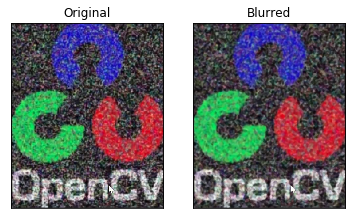

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('opencv_logo_2.png',1)
median = cv2.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## 12.4 双边滤波
函数 cv2.bilateralFilter() 能在保持边界清晰的情况下有效的去除噪音。但是这种操作与其他滤波器相比会比较慢。我们已经知道高斯滤波器是求中心点邻近区域像素的高斯加权平均值。这种高斯滤波器只考虑像素之间的空间关系，而不会考虑像素值之间的关系（像素的相似度）。所以这种方法不会考虑一个像素是否位于边界。因此边界也会别模糊掉，而这正不是我们想要。  
双边滤波在同时使用空间高斯权重和灰度值相似性高斯权重。空间高斯函数确保只有邻近区域的像素对中心点有影响，灰度值相似性高斯函数确保只有与中心像素灰度值相近的才会被用来做模糊运算。所以这种方法会确保边界不会被模糊掉，因为边界处的灰度值变化比较大。  
进行双边滤波的代码如下：

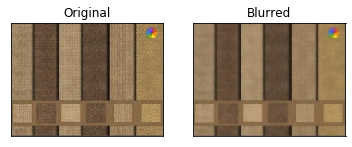

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('bilateralFilter_test.png')
#cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)
#d – Diameter of each pixel neighborhood that is used during filtering.
# If it is non-positive, it is computed from sigmaSpace
#9 邻域直径，两个 75 分别是空间高斯函数标准差，灰度值相似性高斯函数标准差
blur = cv2.bilateralFilter(img,5,75,75)

imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
blurRGB = cv2.cvtColor(blur,cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(imageRGB),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurRGB),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


看见了把，上图中的纹理被模糊掉了，但是边界还在。

## 更多资源
1. Details about the [bilateral filtering](http://people.csail.mit.edu/sparis/bf_course/)